In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
filename = "../../../../data/Galaxy10_DECals.h5"

with h5py.File(filename, "r") as f:

    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array
    ra = f['ra'][()]
    dec = f['dec'][()]
    z = f['redshift'][()]
    label = f['ans'][()]
    images = f['images'][()]

Keys: <KeysViewHDF5 ['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


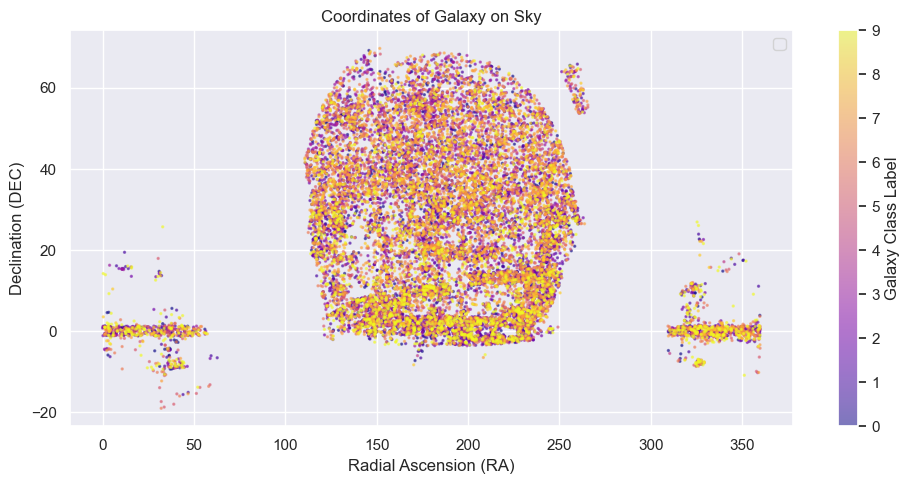

In [16]:
plt.figure(figsize = (10,5))
plt.scatter(ra, dec, c = label, s = 2, cmap = 'plasma', alpha = .5)
cb = plt.colorbar() 
cb.set_label('Galaxy Class Label') 
plt.title("Coordinates of Galaxy on Sky")
plt.xlabel("Radial Ascension (RA)")
plt.ylabel("Declination (DEC)")
plt.legend()
plt.tight_layout()
plt.savefig('../../plots/RADEC.png', bbox_inches='tight')

Text(0.5, 1.0, 'Galaxy Classes Abundance')

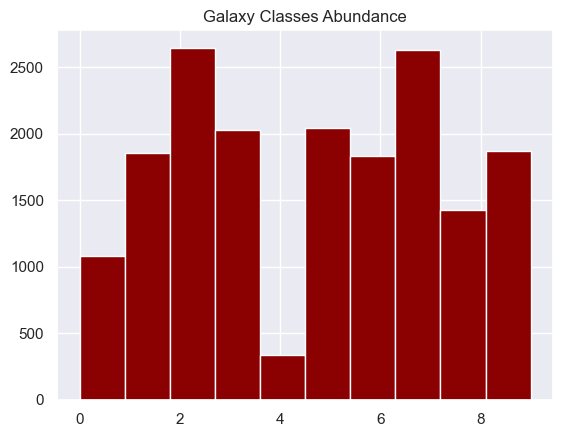

In [17]:
plt.hist(label, color = 'darkred')
plt.title('Galaxy Classes Abundance')

Seems like we are severely lacking labels in 4 (Cigar Shaped Smooth Galaxies). We can omit these

In [18]:
labels = [x for x in label if x!=4]

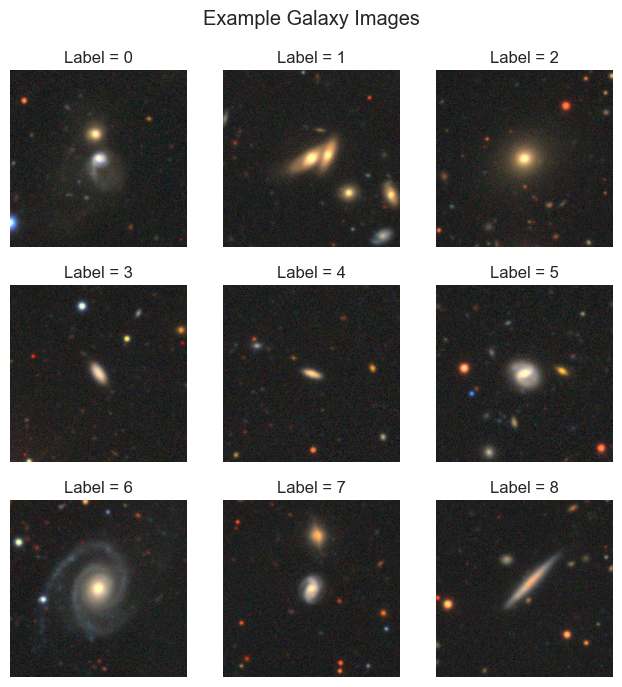

In [19]:
fig = plt.figure(figsize=(7,7))
for i in range(3*3):
    fig.suptitle('Example Galaxy Images')
    ax = fig.add_subplot(3,3, i+1)
    ax.axis('off')
    idx = np.where(label == i)[0][1]
    plt.imshow(images[idx])
    plt.grid(None)
    plt.tight_layout()
    plt.title(f'Label = {label[idx]}')
plt.savefig('../../plots/galaxies.png')


Some redshift values are NaNs

In [ ]:
fig = plt.figure(figsize=(20,20)) 

for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [20]:
bad_idxs = np.where(np.isnan(z))[0]
clean_z = np.delete(z, bad_idxs)
clean_label = np.delete(label, bad_idxs)

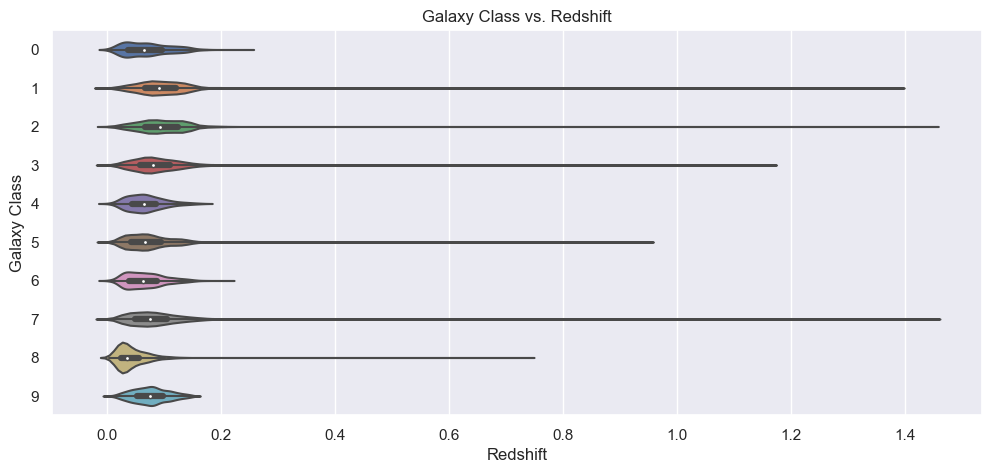

In [21]:
plt.figure(figsize=(12,5))
sns.violinplot(x=clean_z, y=clean_label, orient='h')
plt.xlabel('Redshift')
plt.ylabel('Galaxy Class');
plt.title("Galaxy Class vs. Redshift")
plt.savefig('../../plots/class_redshift_dependence.png')

In [10]:
import tensorflow as tf
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

In [2]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [25]:
images, labels = galaxy10.load_data()

C:\Users\F\.astroNN\datasets\Galaxy10.h5 was found!


In [26]:
labels

array([2, 2, 4, ..., 2, 9, 2], dtype=uint8)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

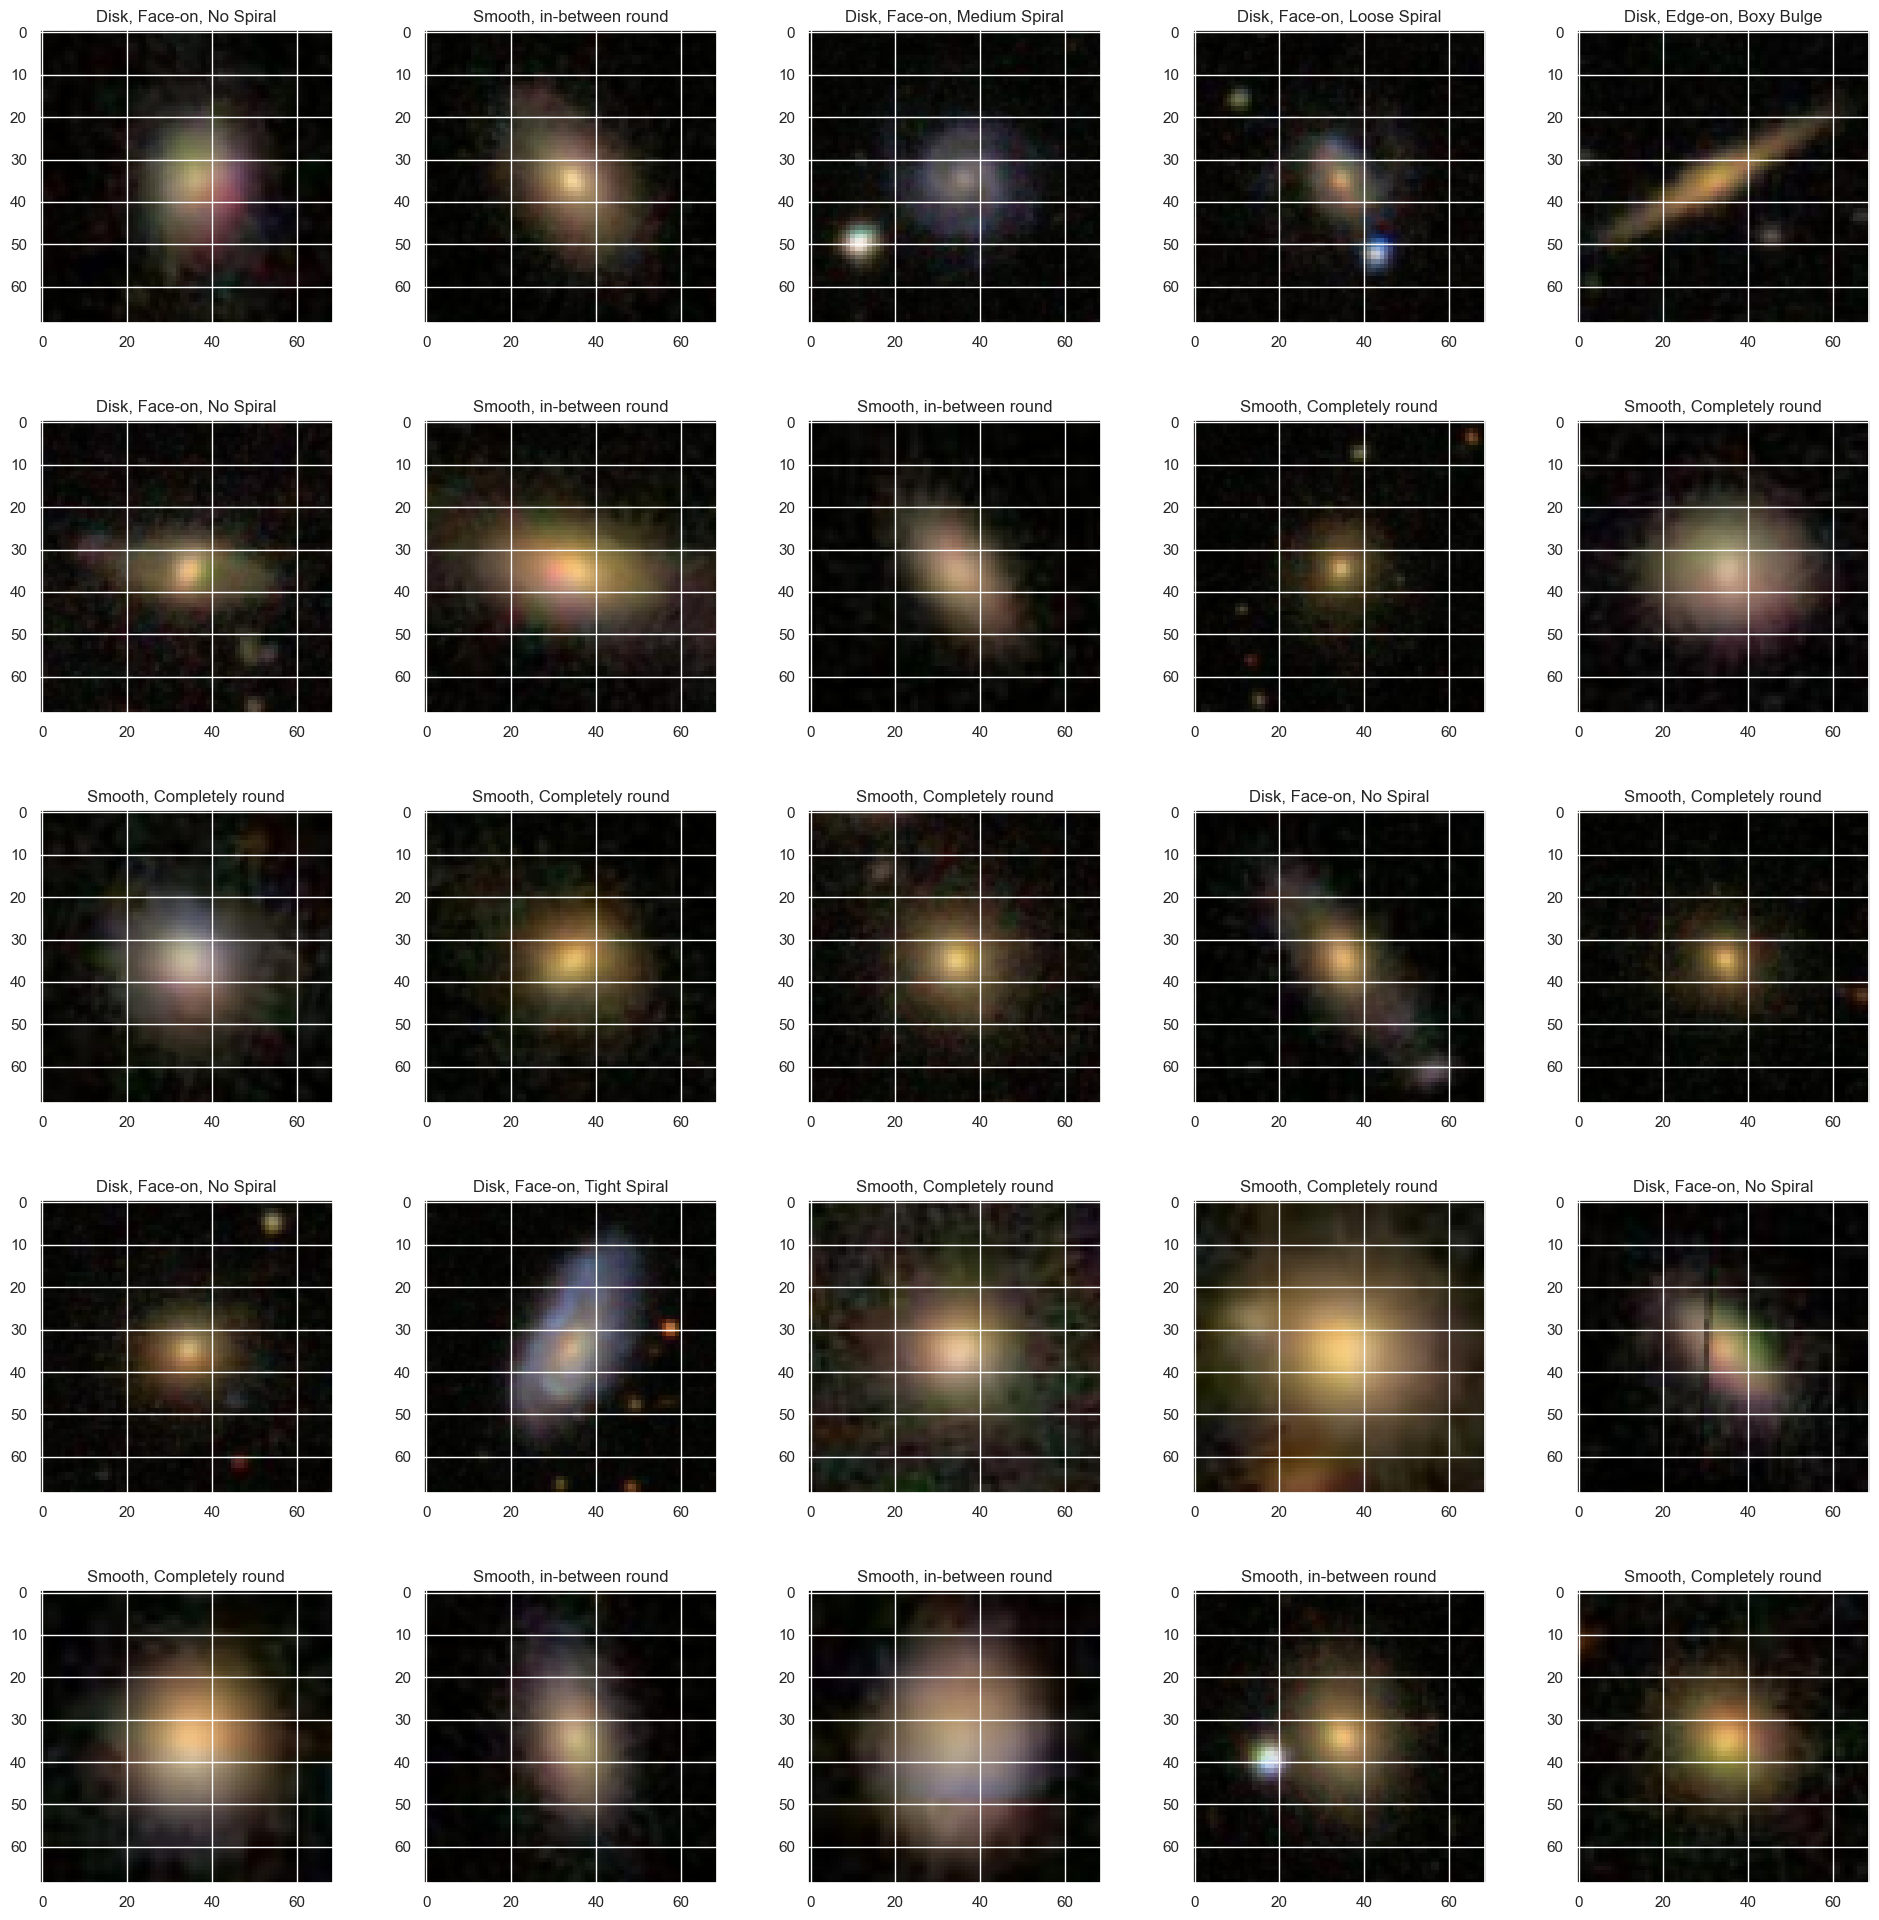

In [35]:
fig = plt.figure(figsize=(20,20)) 

for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [29]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


In [33]:
labels.shape

(21785,)

C:\Users\F\AppData\Local\Temp\ipykernel_13288\139427031.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


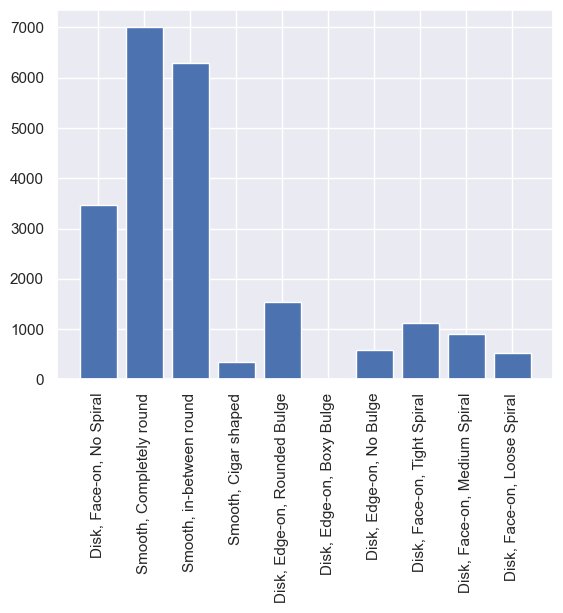

In [30]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)